# Trabalho 02 de Métodos Quantitativos
###### Pedro Henrique Ventura 
###### Aluno de Sistemas Multimídia da Pós Graduação em Ciência da Computação (2019). Terceiro Trimestre
## Bibliotecas

In [1]:
#Obtenção dos dados do site:
import requests
from urllib import request, response, error, parse
from urllib.request import urlopen
from bs4 import BeautifulSoup

#Manipulação de dados, bases e geração de gráficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Obtendo dados
#### Nesta etapa, obteve-se dados referêntes a quadrinhos na loja virtual da marvel (comicstore.marvel.com); Nome da HQ e Preço.
##### Obs: Caso não queira  baixar todos os dados, execute a partir do item 2

In [2]:
url = []
for i in range(1, 43): #Pegando todas as páginas que possuiam hqs para venda
    url.append('https://comicstore.marvel.com/comics-best-sellers?cu=0&bestsellerList_pg=' + str(i))

#Listas para armazenar nome, numeração e preço das hqs
hq_name = []
hq_numbering = []
hq_price = []

num = 0 #variável para contar de quais páginas já foram pegos 

for x in url: #pegando cada página
    num = num+1
    html = urlopen(x)
    soup = BeautifulSoup (html,"lxml")
    title = soup.title
    titleText = title.get_text()
    print("Página" + titleText + " - " + str(num) + " Obtida") #exibindo que já foi pego
    
    figcaption = soup.find_all('figcaption', class_='content-info') ## Obtendo o Título e Preço das obras
    for elemen in figcaption:
        wrappers = elemen.find('h5', class_='content-title cu-alc')
        hq_name.append(wrappers.get_text().replace('-)', ')'))
        
        wrappers = elemen.find('h6', class_='content-subtitle cu-alc')
        if wrappers.get_text().__contains__('Issue '):
            hq_numbering.append(wrappers.get_text().split("Issue ")[1])
        else: 
            hq_numbering.append(wrappers.get_text())
            
        wrappers = elemen.find('h5', class_='item-price cu-alc')
        hq_price.append(float(wrappers.get_text().split("$")[1]))
        
        
        

PáginaComics Best Sellers - Marvel Comics - 1 Obtida
PáginaComics Best Sellers - Marvel Comics - 2 Obtida
PáginaComics Best Sellers - Marvel Comics - 3 Obtida
PáginaComics Best Sellers - Marvel Comics - 4 Obtida
PáginaComics Best Sellers - Marvel Comics - 5 Obtida
PáginaComics Best Sellers - Marvel Comics - 6 Obtida
PáginaComics Best Sellers - Marvel Comics - 7 Obtida
PáginaComics Best Sellers - Marvel Comics - 8 Obtida
PáginaComics Best Sellers - Marvel Comics - 9 Obtida
PáginaComics Best Sellers - Marvel Comics - 10 Obtida
PáginaComics Best Sellers - Marvel Comics - 11 Obtida
PáginaComics Best Sellers - Marvel Comics - 12 Obtida
PáginaComics Best Sellers - Marvel Comics - 13 Obtida
PáginaComics Best Sellers - Marvel Comics - 14 Obtida
PáginaComics Best Sellers - Marvel Comics - 15 Obtida
PáginaComics Best Sellers - Marvel Comics - 16 Obtida
PáginaComics Best Sellers - Marvel Comics - 17 Obtida
PáginaComics Best Sellers - Marvel Comics - 18 Obtida
PáginaComics Best Sellers - Marvel Co

In [3]:
# Criando e salvando a base
data = {'Nome':hq_name, 'Numeacao': hq_numbering, 'Preco':hq_price} 
dsetMarvelHQ = pd.DataFrame(data) 
dsetMarvelHQ.to_csv(r'C:\Users\pe-ri\Documents\Python Scripts\PGCC-Métodos Quantitativos\PGCC-MQ\MQ02\dsetMarvelHQ.csv',index = None, header=True)


## 2. Visualizando a base gerada

In [4]:
# Carregando a Base para não ter que ficar rodando sempre a parte 1
df = pd.read_csv(r'C:\Users\pe-ri\Documents\Python Scripts\PGCC-Métodos Quantitativos\PGCC-MQ\MQ02\dsetMarvelHQ.csv')

# Exibindo primeiros e últimos dados
print(df.head())
print(df.tail())

                                     Nome   Numeacao  Preco
0                       House Of X (2019)  #6 (of 6)   4.99
1                    Immortal Hulk (2018)        #24   3.99
2                        Star Wars (2015)        #72   3.99
3                   Fantastic Four (2018)        #15   3.99
4  Absolute Carnage: Immortal Hulk (2019)         #1   4.99
                                              Nome     Numeacao  Preco
985                                Avengers (2018)           #9   1.99
986                               Thor (2018-2019)          #11   1.99
987  Star Wars Legends Epic Collection: The Empire       Vol. 1  29.99
988                          Marvel Team-Up (2019)           #5   3.99
989                           Secret Empire (2017)  #10 (of 10)   1.99


##### Com tais dados, optou-se por fazer uma análise com relação aos preços das HQs por se tratar de uma variável Discreta, e o nome ser uma V. Categórica

            Preco
count  990.000000
mean     7.095051
std      5.785785
min      0.990000
25%      1.990000
50%      4.990000
75%     10.990000
max     49.990000
AxesSubplot(0.125,0.125;0.775x0.755)


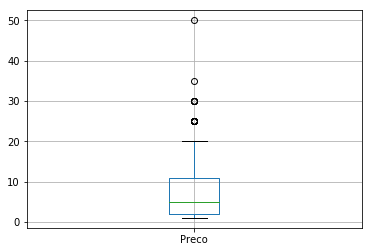

In [5]:
# Exibindo informações estatíticas básicas dos dados 
print(df.describe())
boxplot = df.boxplot(column=['Preco'])
print(boxplot)

##### Foi possível perceber a existência de outliers por um simples boxplot. Logo, Fora feito então 2 processos, um com os outliers, e outro sem.

### 3. Com Outliers
#### 3.1 Calculando CDF

In [6]:
"""Pegando a quantidade de ocorrências e calculando a probabilidade"""

#variáveis para armazenar total de valores distintos ocorrem ($totalOcorrencia), 
# e quais valores ocorrem e em quantas vezes ($ocorrencias)
totalOcorrencia = 0
ocorrencias = []
ocorrencias = dict()
#calculando quantidade de ocorrências

X = df['Preco'].sort_values(ascending=True) #ordenando min->max
totalAtributos = len(X) #pegando qdt total de atributos
    
for i in X: #agrupando e contando ocorrências
    try:
        ocorrencias[i] += 1
    except KeyError:
        ocorrencias[i] = 1
        totalOcorrencia = totalOcorrencia + 1

print("Total de ocorrências: ", totalOcorrencia)
print("Ocorrências: ", ocorrencias)


Total de ocorrências:  20
Ocorrências:  {0.99: 4, 1.99: 323, 2.99: 3, 3.99: 160, 4.99: 42, 5.99: 6, 6.99: 39, 7.99: 6, 8.99: 137, 9.99: 7, 10.99: 131, 12.99: 27, 14.99: 12, 16.99: 37, 18.99: 1, 19.99: 38, 24.99: 10, 29.99: 5, 34.99: 1, 49.99: 1}


In [7]:
#calculando a probabilidade de ocorrência
probabilidade = []
eixoX = []

for item, totalOcorrenciaIndividual in ocorrencias.items():
    probabilidade.append(totalOcorrenciaIndividual/totalAtributos)
    eixoX.append(item)
print("\nProbabilidade:", probabilidade)

#Calculando eixo X da CDF
ValorEixoX = []
ValorEixoX.append(probabilidade[0])

for i in range(1,totalOcorrencia):
        if i != 0:
            ValorEixoX.append(probabilidade[i]+ValorEixoX[i-1])



Probabilidade: [0.00404040404040404, 0.32626262626262625, 0.0030303030303030303, 0.16161616161616163, 0.04242424242424243, 0.006060606060606061, 0.03939393939393939, 0.006060606060606061, 0.1383838383838384, 0.007070707070707071, 0.13232323232323231, 0.02727272727272727, 0.012121212121212121, 0.03737373737373737, 0.00101010101010101, 0.03838383838383838, 0.010101010101010102, 0.005050505050505051, 0.00101010101010101, 0.00101010101010101]


#### 3.2 Plotando CDF

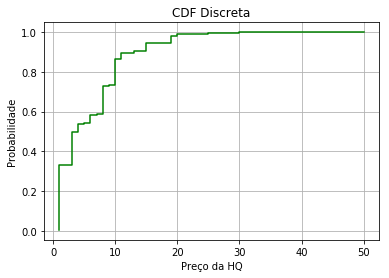

In [8]:
plt.xlabel('Preço da HQ')
plt.ylabel('Probabilidade')
plt.title('CDF Discreta')
plt.grid(True)
plt.step(eixoX, ValorEixoX, color='g')
plt.show()

#### 3.3 Calculando PMF e Criando tabela de relação do preço e PMF

In [9]:
data = {'Nota':eixoX, 'PMF':probabilidade} 
pmf = pd.DataFrame(data) 

print("PMF por Preço")
print(pmf)

PMF por Preço
     Nota       PMF
0    0.99  0.004040
1    1.99  0.326263
2    2.99  0.003030
3    3.99  0.161616
4    4.99  0.042424
5    5.99  0.006061
6    6.99  0.039394
7    7.99  0.006061
8    8.99  0.138384
9    9.99  0.007071
10  10.99  0.132323
11  12.99  0.027273
12  14.99  0.012121
13  16.99  0.037374
14  18.99  0.001010
15  19.99  0.038384
16  24.99  0.010101
17  29.99  0.005051
18  34.99  0.001010
19  49.99  0.001010


#### 3.4 Plotando PMF

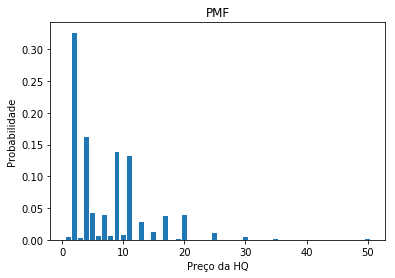

In [10]:
plt.xlabel('Preço da HQ')
plt.ylabel('Probabilidade')
plt.title('PMF')
plt.bar(eixoX, probabilidade,label='PMF')
plt.show()

### 4. Sem Outliers
#### 4.1 Removendo Outliers

            Preco
count  973.000000
mean     6.720730
std      5.023551
min      0.990000
25%      1.990000
50%      3.990000
75%     10.990000
max     19.990000


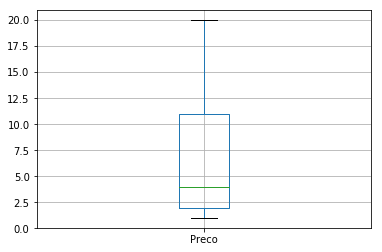

In [11]:
"""Refazendo mas removendo Outliers (>=25)"""
"""Outliers: 24.99: 10, 29.99: 5, 34.99: 1, 49.99: 1"""

outliers = [24.99, 29.99, 34.99, 49.99] #carregando outliers

for k in outliers:
    # Obtendo posição dos outliers na base
    indexNames = df[ df['Preco'] == k ].index
    # Removendo
    df.drop(indexNames , inplace=True)

#Exibindo estatus sem os outliers
print(df.describe())
boxplot = df.boxplot(column=['Preco'])

#### 4.2 Calculando CDF

In [12]:
"""Pegando a quantidade de ocorrências e calculando a probabilidade"""

#variáveis para armazenar total de valores distintos ocorrem ($totalOcorrencia), 
# e quais valores ocorrem e em quantas vezes ($ocorrencias)
totalOcorrencia = 0
ocorrencias = []
ocorrencias = dict()
#calculando quantidade de ocorrências

X = df['Preco'].sort_values(ascending=True) #ordenando min->max
totalAtributos = len(X) #pegando qdt total de atributos
    
for i in X: #agrupando e contando ocorrências
    try:
        ocorrencias[i] += 1
    except KeyError:
        ocorrencias[i] = 1
        totalOcorrencia = totalOcorrencia + 1

print("Total de ocorrências: ", totalOcorrencia)
print("Ocorrências: ", ocorrencias)


Total de ocorrências:  16
Ocorrências:  {0.99: 4, 1.99: 323, 2.99: 3, 3.99: 160, 4.99: 42, 5.99: 6, 6.99: 39, 7.99: 6, 8.99: 137, 9.99: 7, 10.99: 131, 12.99: 27, 14.99: 12, 16.99: 37, 18.99: 1, 19.99: 38}


In [13]:
#calculando a probabilidade de ocorrência
probabilidade = []
eixoX = []

for item, totalOcorrenciaIndividual in ocorrencias.items():
    probabilidade.append(totalOcorrenciaIndividual/totalAtributos)
    eixoX.append(item)
print("\nProbabilidade:", probabilidade)

#Calculando eixo X da CDF
ValorEixoX = []
ValorEixoX.append(probabilidade[0])

for i in range(1,totalOcorrencia):
        if i != 0:
            ValorEixoX.append(probabilidade[i]+ValorEixoX[i-1])



Probabilidade: [0.0041109969167523125, 0.3319630010277492, 0.003083247687564234, 0.1644398766700925, 0.04316546762589928, 0.006166495375128468, 0.040082219938335044, 0.006166495375128468, 0.1408016443987667, 0.007194244604316547, 0.13463514902363824, 0.02774922918807811, 0.012332990750256937, 0.03802672147995889, 0.0010277492291880781, 0.03905447070914697]


#### 4.3 Plotando CDF

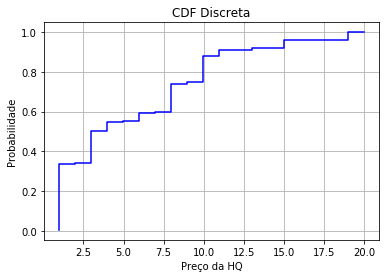

In [14]:
plt.xlabel('Preço da HQ')
plt.ylabel('Probabilidade')
plt.title('CDF Discreta')
plt.grid(True)
plt.step(eixoX, ValorEixoX, color='b')
plt.show()

#### 4.4 Calculando PMF e Criando tabela de relação do preço e PMF

In [15]:
data = {'Nota':eixoX, 'PMF':probabilidade} 
pmf = pd.DataFrame(data) 

print("PMF por Preço")
print(pmf)

PMF por Preço
     Nota       PMF
0    0.99  0.004111
1    1.99  0.331963
2    2.99  0.003083
3    3.99  0.164440
4    4.99  0.043165
5    5.99  0.006166
6    6.99  0.040082
7    7.99  0.006166
8    8.99  0.140802
9    9.99  0.007194
10  10.99  0.134635
11  12.99  0.027749
12  14.99  0.012333
13  16.99  0.038027
14  18.99  0.001028
15  19.99  0.039054


#### 4.5 Plotando PMF

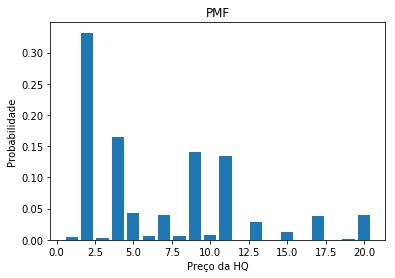

In [16]:
plt.xlabel('Preço da HQ')
plt.ylabel('Probabilidade')
plt.title('PMF')
plt.bar(eixoX, probabilidade,label='PMF')
plt.show()